## Deep Learning Challenge

### Loading the CIFAR10 data
The data can be loaded directly from keras (`keras.datasets.cifar10`).

```python
cifar10 = keras.datasets.cifar10
(train_images, train_labels), (test_images, test_labels) = cifar10.load_data()
```

In [1]:
from tensorflow.keras.datasets import cifar10
from tensorflow.keras import models
from tensorflow.keras import layers
from tensorflow import keras
from tensorflow.keras.utils import to_categorical
import numpy as np

In [2]:
cifar10 = keras.datasets.cifar10
(train_images, train_labels), (test_images, test_labels) = cifar10.load_data()

In [3]:
# check the shape of the data
print(train_images.shape)
print(train_labels.shape)

(50000, 32, 32, 3)
(50000, 1)


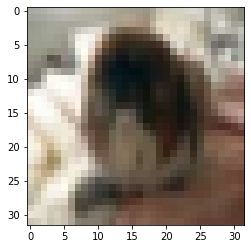

In [4]:
# print the first image in the training set

import matplotlib.pyplot as plt
import matplotlib.image as mpimg
imgplot = plt.imshow(test_images[200])
plt.show()

In [5]:
# explore the labels
print(train_labels[0:10],test_labels[0:10]) # [9 0 0 3 0 2 7 2 5 5]

[[6]
 [9]
 [9]
 [4]
 [1]
 [1]
 [2]
 [7]
 [8]
 [3]] [[3]
 [8]
 [8]
 [0]
 [6]
 [6]
 [1]
 [6]
 [3]
 [1]]


In [6]:
# get the number of classes and print the class names
num_classes = len(np.unique(train_labels))
print("Number of classes: ", num_classes)


Number of classes:  10


In [7]:
# get class names
class_names = ['airplane','automobile','bird','cat','deer', 'dog','frog','horse','ship','truck']
# create a dict to map class names to class ids
class_dict = {i:class_name for i,class_name in enumerate(class_names)}
print(class_dict)

{0: 'airplane', 1: 'automobile', 2: 'bird', 3: 'cat', 4: 'deer', 5: 'dog', 6: 'frog', 7: 'horse', 8: 'ship', 9: 'truck'}


#### Task: Build a convulution neural network (CNN) to predict the object in the images. 

Try to do it on your own first before consulting with peers or tutorials on the internet. If you are stuck early, reach out to a mentor who will point you in the right direction.

In [8]:
from tensorflow.keras.models import Sequential        # Helper to build a network from a sequence of layers
from tensorflow.keras.layers import Dense             # Fully-connected layer
from tensorflow.keras.callbacks import EarlyStopping  # To stop training early if val loss stops decreasing

In [9]:
# scale the images to be between 0 and 1
train_images = train_images.astype('float32') / 255
test_images = test_images.astype('float32') / 255

# check the shape of the data
print(train_images.shape)
print(train_labels.shape)

(50000, 32, 32, 3)
(50000, 1)


In [10]:
# convert the class vectors to binary class matrices
train_labels = keras.utils.to_categorical(train_labels, num_classes)
test_labels = keras.utils.to_categorical(test_labels, num_classes)


In [14]:
# build the model
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3))) # 32 filters, each 3x3
model.add(layers.MaxPooling2D((2, 2))) # 2x2 max pooling
model.add(layers.Conv2D(64, (3, 3), activation='relu')) # 64 filters, each 3x3
model.add(layers.MaxPooling2D((2, 2))) # 2x2 max pooling
model.add(layers.Conv2D(32, (3, 3), activation='relu')) # 96 filters, each 3x3
model.add(layers.MaxPooling2D((2, 2))) # 2x2 max pooling
model.add(layers.Flatten()) # flatten to 1D
model.add(layers.Dropout(0.2)) # dropout 50% of the units
model.add(layers.Dense(128, activation='relu')) # 128 units
model.add(layers.Dense(10, activation='softmax')) # 10-way softmax classification
model.summary()



Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 15, 15, 32)       0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 6, 6, 64)         0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 4, 4, 32)          18464     
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 2, 2, 32)        

In [16]:
# compile the model
batch_size = 32
epochs = 100
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.fit(train_images, train_labels, batch_size=batch_size, epochs=epochs, validation_data=(test_images, test_labels))


Epoch 1/100
1563/1563 [==============================] - 18s 11ms/step - loss: 1.3271 - accuracy: 0.5217 - val_loss: 1.1806 - val_accuracy: 0.5773
Epoch 2/100
1563/1563 [==============================] - 17s 11ms/step - loss: 1.1955 - accuracy: 0.5726 - val_loss: 1.1400 - val_accuracy: 0.5901
Epoch 3/100
1563/1563 [==============================] - 17s 11ms/step - loss: 1.1077 - accuracy: 0.6073 - val_loss: 1.0698 - val_accuracy: 0.6202
Epoch 4/100
1563/1563 [==============================] - 17s 11ms/step - loss: 1.0432 - accuracy: 0.6281 - val_loss: 1.0240 - val_accuracy: 0.6380
Epoch 5/100
1563/1563 [==============================] - 17s 11ms/step - loss: 0.9898 - accuracy: 0.6489 - val_loss: 1.0149 - val_accuracy: 0.6415
Epoch 6/100
1563/1563 [==============================] - 17s 11ms/step - loss: 0.9510 - accuracy: 0.6623 - val_loss: 0.9626 - val_accuracy: 0.6598
Epoch 7/100
1563/1563 [==============================] - 17s 11ms/step - loss: 0.9113 - accuracy: 0.6771 - val_loss: 0

In [13]:
# evaluate the model
test_loss, test_acc = model.evaluate(test_images, test_labels)
print('Test accuracy:', test_acc)


313/313 [==============================] - 2s 7ms/step - loss: 0.9398 - accuracy: 0.7330
Test accuracy: 0.7330000400543213
